In [1]:
import numpy as np
import scipy as sp
import scipy.sparse as sparse
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=4,suppress=True)

from dedalus_sphere import jacobi as Jacobi

# Add '../' to path
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import config
config.internal_dtype = 'float128'

import spherinder as sph
from spherinder import psi, phi, expand, plotfield

In [2]:
ns, neta = 500, 501
s, eta = np.linspace(0,1,ns), np.linspace(-1,1,neta)

g_disable_basis_plots = False

In [3]:
def plot_basis(basis, s, eta):
    Nmax = len(basis)
    ncols = 3
    nrows = (Nmax+ncols-1)//ncols
    fig, plot_axes = plt.subplots(nrows,ncols,figsize=(11,4*nrows))
    row, col = 0, 0
    for k in range(Nmax):
        plotfield(s, eta, basis[k], fig, plot_axes[row][col])
        col += 1
        if col == ncols:
            col = 0
            row += 1


def plot_radial(basis, s, eta, etavalues):
    if np.isscalar(etavalues): etavalues = [etavalues]
    neta = len(etavalues)

    fig, plot_axes = plt.subplots(1,neta,figsize=(4*neta,4))
    if neta == 1: plot_axes = [plot_axes]
    for i in range(neta):
        etaindex = np.argmin(np.abs(eta-etavalues[i]))
        for k in range(len(basis)):
            plot_axes[i].plot(s,basis[k][etaindex,:])
        plot_axes[i].grid()
        plot_axes[i].set_title('ell = {}, η = {}'.format(ell, eta[etaindex]))
        plot_axes[i].set_xlabel('s')
        plot_axes[i].grid(True)


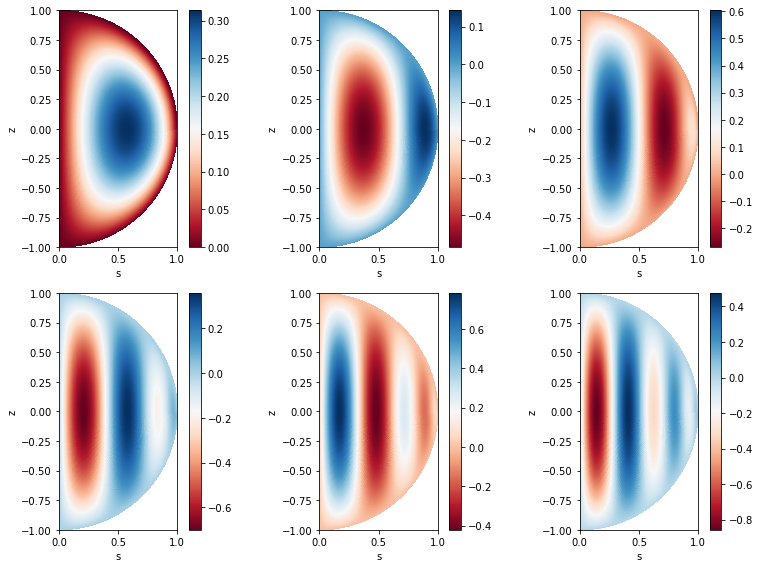

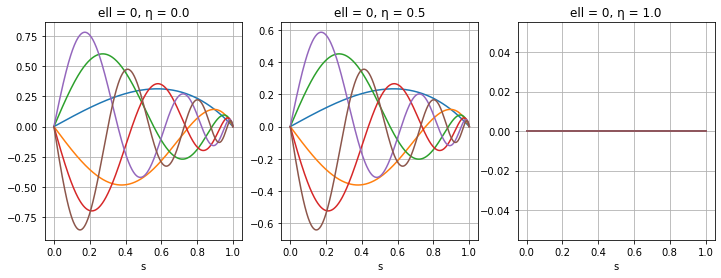

In [4]:
Nmax, m, ell = 6, 1, 0
basis = phi(Nmax, m, ell, s, eta)

if not g_disable_basis_plots:
    plot_basis(basis, s, eta)
    plot_radial(basis, s, eta, [0.0, 0.5, 1.0])

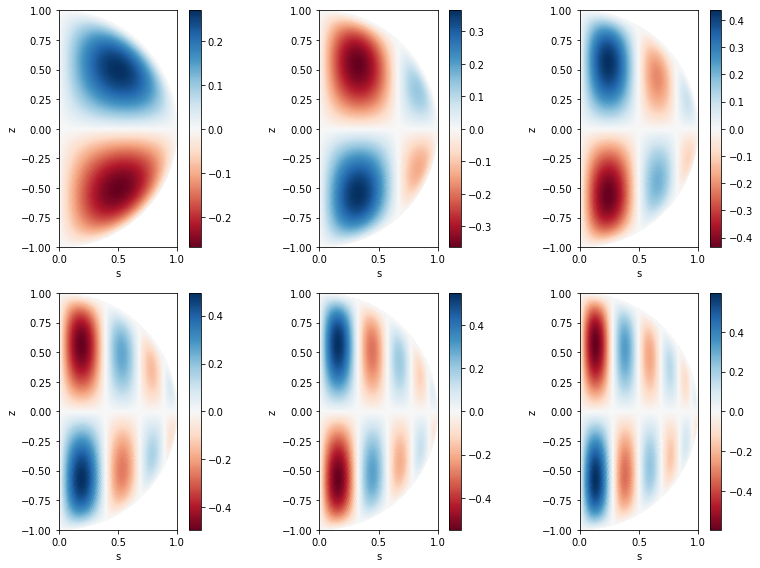

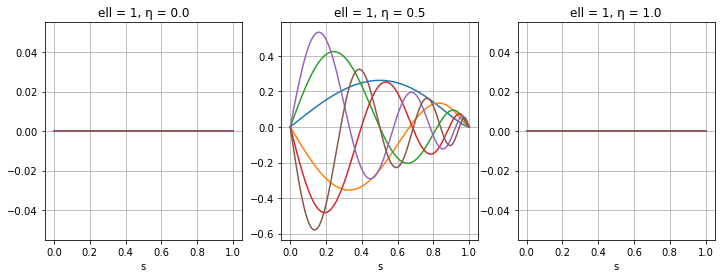

In [5]:
Nmax, m, ell = 6, 1, 1
basis = phi(Nmax, m, ell, s, eta)

if not g_disable_basis_plots:
    plot_basis(basis, s, eta)
    plot_radial(basis, s, eta, [0.0, 0.5, 1.0])

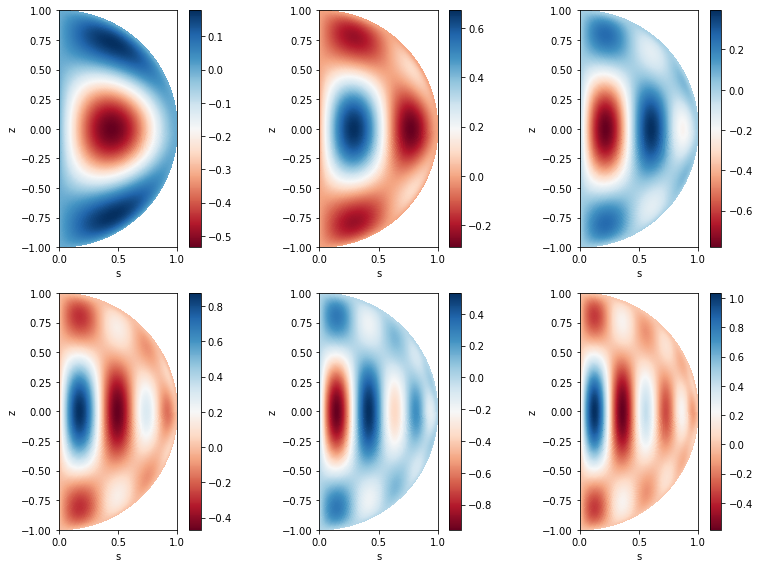

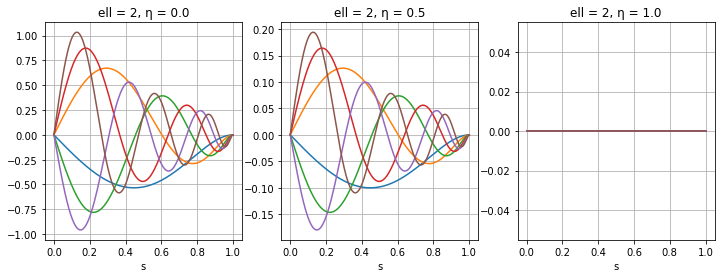

In [6]:
Nmax, m, ell = 6, 1, 2
basis = phi(Nmax, m, ell, s, eta)

if not g_disable_basis_plots:
    plot_basis(basis, s, eta)
    plot_radial(basis, s, eta, [0.0, 0.5, 1.0])

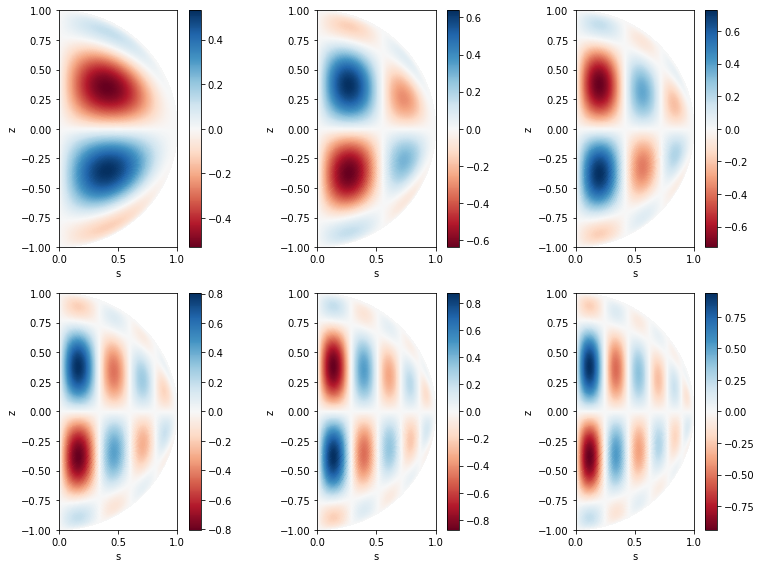

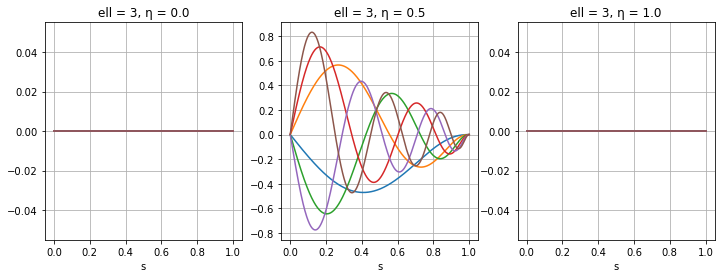

In [7]:
Nmax, m, ell = 6, 1, 3
basis = phi(Nmax, m, ell, s, eta)

if not g_disable_basis_plots:
    plot_basis(basis, s, eta)
    plot_radial(basis, s, eta, [0.0, 0.5, 1.0])

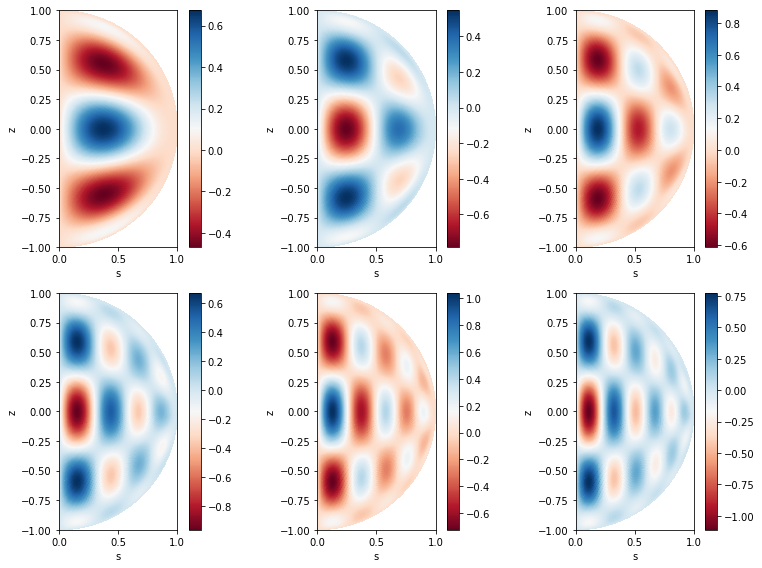

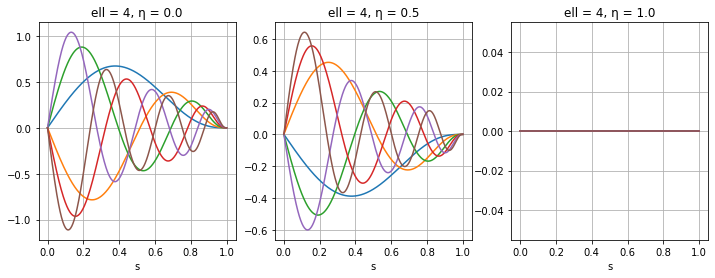

In [8]:
Nmax, m, ell = 6, 1, 4
basis = phi(Nmax, m, ell, s, eta)

if not g_disable_basis_plots:
    plot_basis(basis, s, eta)
    plot_radial(basis, s, eta, [0.0, 0.5, 1.0])

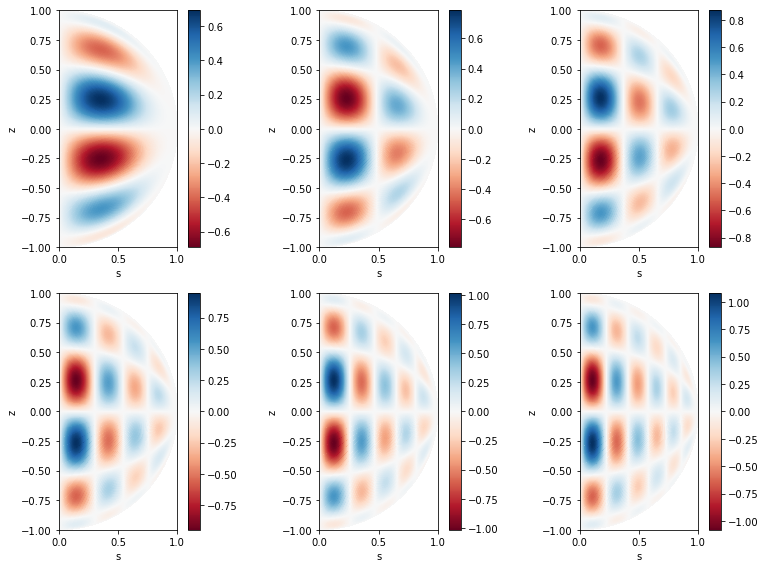

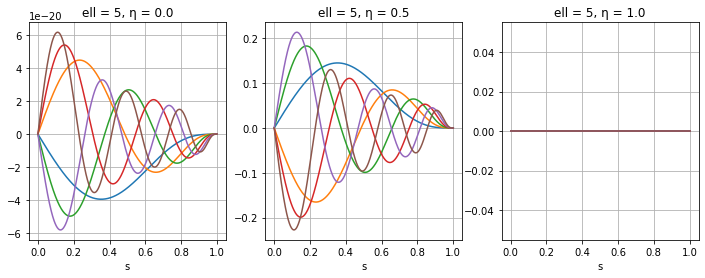

In [9]:
Nmax, m, ell = 6, 1, 5
basis = phi(Nmax, m, ell, s, eta)

if not g_disable_basis_plots:
    plot_basis(basis, s, eta)
    plot_radial(basis, s, eta, [0.0, 0.5, 1.0])

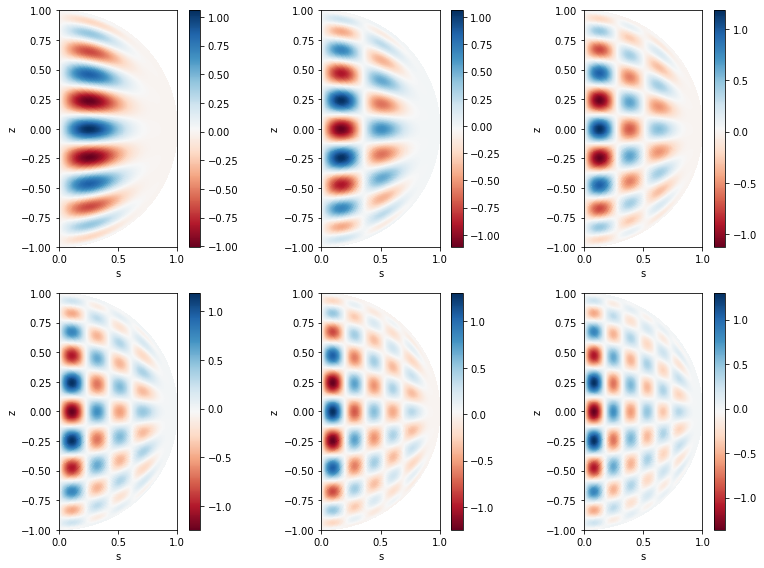

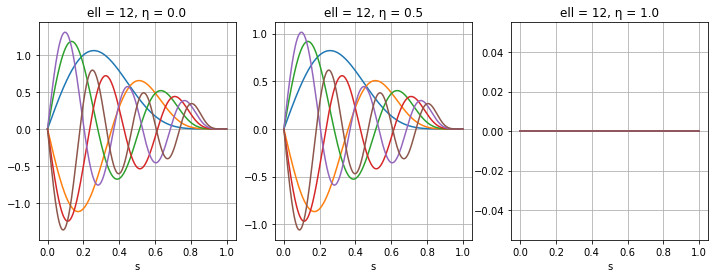

In [10]:
Nmax, m, ell = 6, 1, 12
basis = phi(Nmax, m, ell, s, eta)

if not g_disable_basis_plots:
    plot_basis(basis, s, eta)
    plot_radial(basis, s, eta, [0.0, 0.5, 1.0])

In [11]:
A = Jacobi.operator('A')
B = Jacobi.operator('B')

a_ell_0 = array([2.2361, 1.5275, 1.3416, 1.2536, 1.2019, 1.1677])
a_ell_1 = array([3.7417, 2.4495, 1.9821, 1.7416, 1.5954, 1.4973])
ratio = array([3.118 , 1.7146, 1.4271, 1.3033, 1.2346, 1.191 ])
ratio / a_ell_1 = array([0.8333, 0.7   , 0.72  , 0.7483, 0.7738, 0.7955])


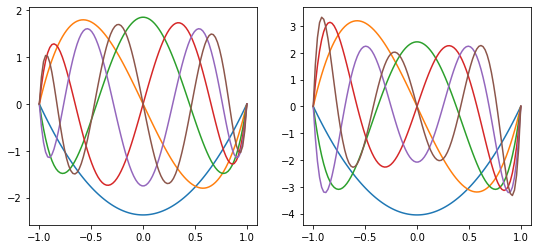

In [12]:
Lmax, alpha = 8, 0

bc = Jacobi.polynomials(Lmax,alpha,alpha,1.0)
a_ell_0 = bc[2:]/bc[:-2]

bc = Jacobi.polynomials(Lmax,alpha+1,alpha+1,1.0)
a_ell_1 = bc[2:]/bc[:-2]

eta = np.linspace(-1.,1.,100)
Peta = Jacobi.polynomials(Lmax,alpha,alpha,eta).T
peta0 = Peta[:,2:] - a_ell_0 * Peta[:,:-2]
Peta = Jacobi.polynomials(Lmax,alpha+1,alpha+1,eta).T
peta1 = Peta[:,2:] - a_ell_1 * Peta[:,:-2]

fig, ax = plt.subplots(1,2,figsize=(9,4))
ax[0].plot(eta,peta0)
ax[1].plot(eta,peta1)

AB = (A(+1) @ B(+1))(Lmax,alpha,alpha).todense()
alpha_ell = np.diag(AB)

ratio = alpha_ell[:-2]/alpha_ell[2:] * a_ell_0
debug = lambda name: print(name + ' = ' + repr(eval(name)))
debug('a_ell_0')
debug('a_ell_1')
debug('ratio')
debug('ratio / a_ell_1')

In [17]:
m, Lmax, Nmax, alpha, sigma = 1, 5, 5, 1, 0
Op = sph.operator('1-r**2')(m, Lmax, Nmax, alpha, sigma)

print(np.shape(Op))
print(np.shape(sph.remove_zero_rows(Op)))

(42, 25)
(40, 25)


In [14]:
ABd = (A(-1) @ B(-1))(Lmax,alpha,alpha).todense()
zmat = np.diag(np.diag(ABd,-2),-2)[:,:Lmax]
print(ABd)
print(zmat)


[[ 0.8165  0.      0.      0.      0.    ]
 [ 0.      0.6325  0.      0.      0.    ]
 [-0.3651  0.      0.5855  0.      0.    ]
 [ 0.     -0.414   0.      0.5634  0.    ]
 [ 0.      0.     -0.4364  0.      0.5505]
 [ 0.      0.      0.     -0.4495  0.    ]
 [ 0.      0.      0.      0.     -0.458 ]]
[[ 0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.    ]
 [-0.3651  0.      0.      0.      0.    ]
 [ 0.     -0.414   0.      0.      0.    ]
 [ 0.      0.     -0.4364  0.      0.    ]
 [ 0.      0.      0.     -0.4495  0.    ]
 [ 0.      0.      0.      0.     -0.458 ]]
